# K-means Clustering:  Isotopic Composition Plutonium Batches

![A left-hand with 'I'm a lefty' written on it](https://imgur.com/2ksgRt3.png)
<a href="https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/"> Image courtesy of Analytics Vidhya</a>

This data is fairly odd and K-Means may not be ideal for it in certain respects, but the takeaway is that it can do an ok job with whispy, elongated shapes.  

(A more ideal model is probably DBSCAN or a hierachical clustering.)

Here's our [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html) for the interested:

    Pu238: the percentages of (238)Pu, always less than 2 percent.

    Pu239: the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240: percentage of the plutonium 240 isotope.

    Pu241: percentage of the plutonium 241 isotope.

In [51]:
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

%matplotlib inline

In [52]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Let's use Pu239 and Pu240 as our features.

In [53]:
df = pd.DataFrame(df, columns=["Pu239", "Pu240"])
df.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


###  Let's plot Pu239 and Pu240 for reference.

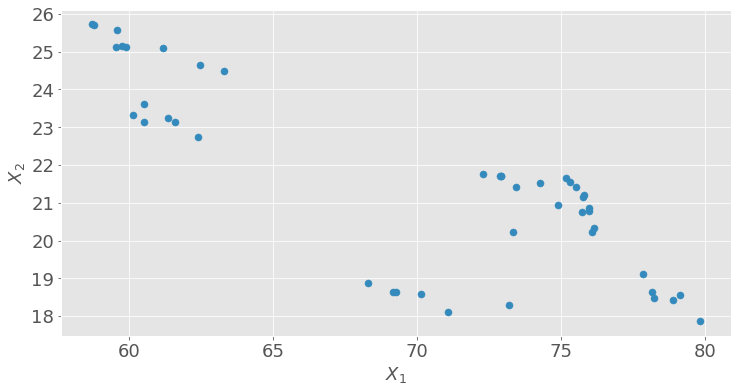

In [54]:
ax = df.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18);

### Now, let's use K-Means to cluster our data using "Pu239" and "Pu240" features

In [55]:
X = df[['Pu239', 'Pu240']]


In [56]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

### Assign clusters assignments (predictions) back to the original dataframe

In [57]:
df['cluster'] = km.labels_

In [58]:
df.head()

,Pu239,Pu240,cluster
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,2
4,73.317,20.223,1


### Let's reference the coordinates for the centroids plot with your "Pu239" and "Pu240" scatter plot

In [59]:
centroids = pd.DataFrame(km.cluster_centers_,
                       columns=['Pu239', 'Pu240'])

centroids

,Pu239,Pu240
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


<Figure size 504x504 with 0 Axes>

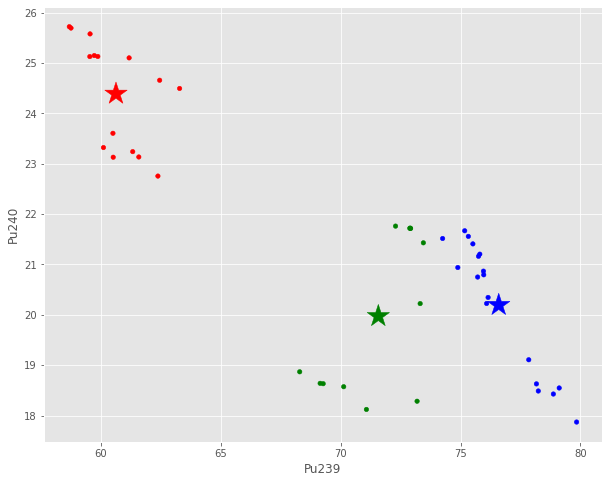

In [60]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### To improve things a little, let's scale our data, rerun our model, and then plot again.

In [61]:
X = df[['Pu239', 'Pu240']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km_sc = KMeans(n_clusters=3, random_state=42)
km_sc.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [62]:
centroids_sc = pd.DataFrame(sc.inverse_transform(km_sc.cluster_centers_), 
                        columns = ["Pu239", "Pu240"])

<Figure size 504x504 with 0 Axes>

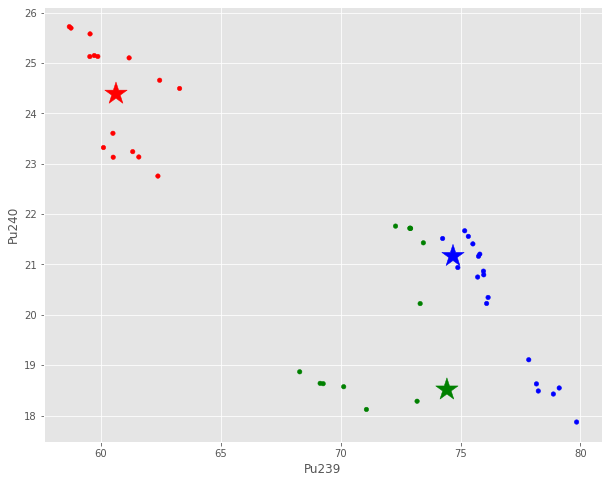

In [64]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids_sc.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score to confirm what our eyes are telling us.

In [65]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km_sc.labels_)

0.633217477686232